# Clustering

## Inter cluster distance map

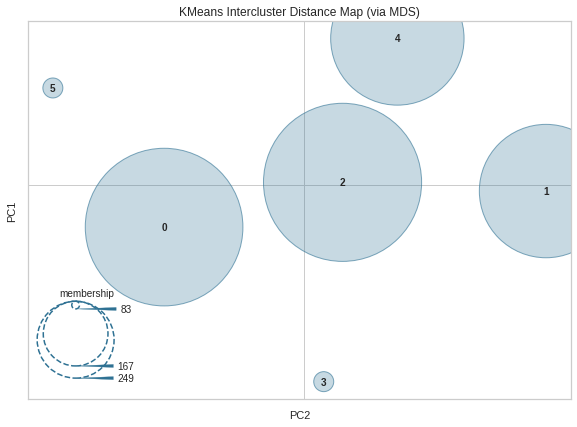

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [4]:
# Generate data and initialize the model
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)
model = KMeans(6)

import yellowbrick.cluster

visualizer = yellowbrick.cluster.InterclusterDistance(model, size = (700, 500))
visualizer.fit(X)
visualizer.show()

## Elbow plot

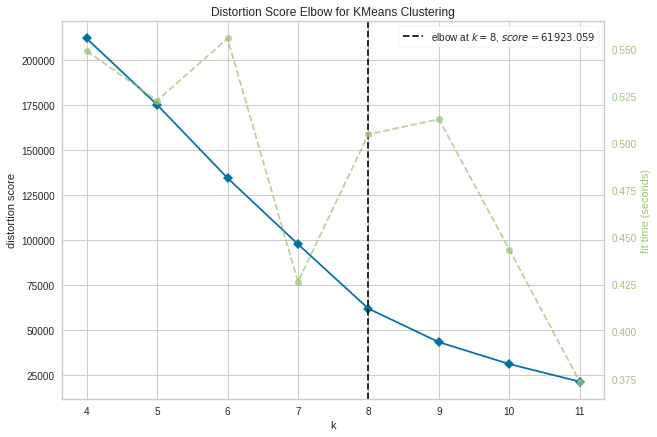

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Generate data and import the model
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, n_features=12, centers=12, random_state=42)

import yellowbrick.cluster

visualizer = yellowbrick.cluster.KElbowVisualizer(
    KMeans(), 
    k = (4, 12), 
    metric ="distortion", 
    size = (700, 500))
visualizer.fit(X)
visualizer.show()

## Clustering heatmap

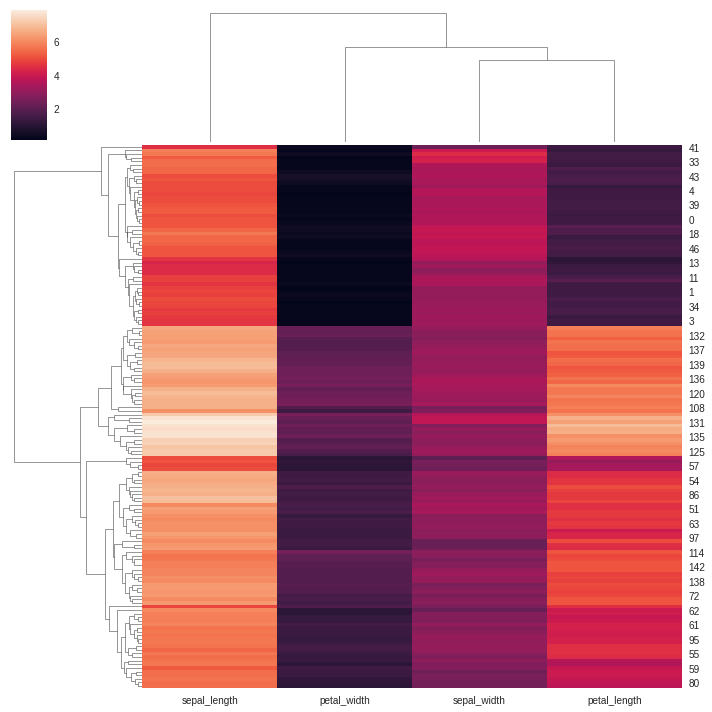

In [30]:
# Load the dataset
import seaborn as sns
data = sns.load_dataset("iris")
data.pop("species")

import seaborn as sns

heatmap = sns.clustermap(data)

## Parallel coordinates plot

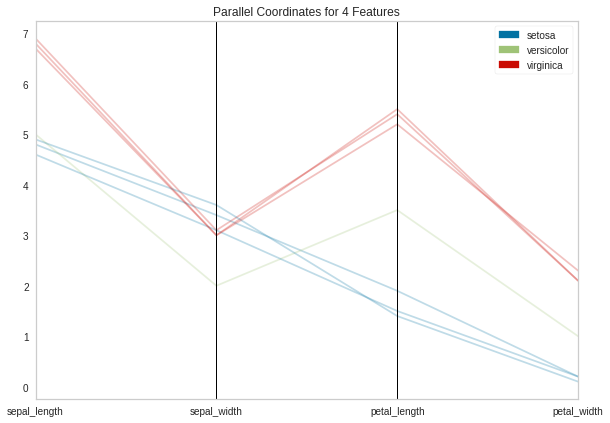

<AxesSubplot:title={'center':'Parallel Coordinates for 4 Features'}>

In [52]:
# Load the dataset
import seaborn as sns
X = sns.load_dataset("iris")
y = X.pop("species")
# Get lists of feature names and class names
features = list(X.columns)
classes = list(y.unique())

import yellowbrick.features

visualizer = yellowbrick.features.ParallelCoordinates(
    classes = classes, 
    features = features, 
    sample = 0.05, 
    shuffle = True, 
    size = (700, 500))
visualizer.fit_transform(X, y)
visualizer.show()

# Feature analysis

## Beeswarm plot

devel is an invalid version and will not be supported in a future release
2.10.1.Ludicrous.Lemur is an invalid version and will not be supported in a future release
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


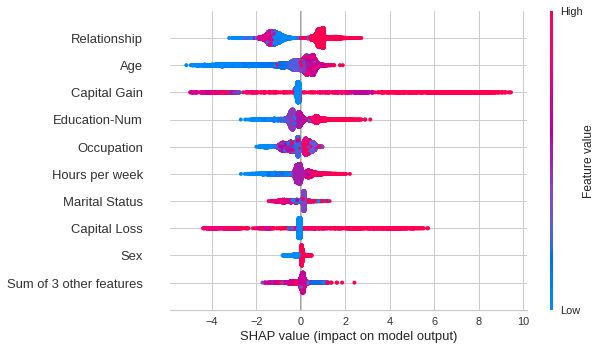

In [54]:
# Load data and train the model
import shap
import xgboost
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

import shap

explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.beeswarm(shap_values)

## Waterfall plot

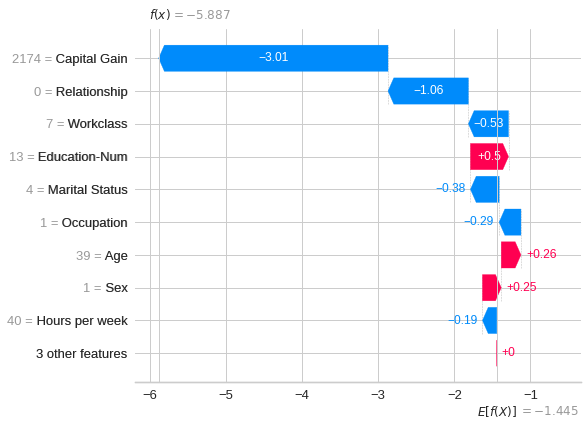

In [56]:
# Load data and train the model
import shap
import xgboost
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier().fit(X, y)

import shap

explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

# Classification

## Correlation matrix

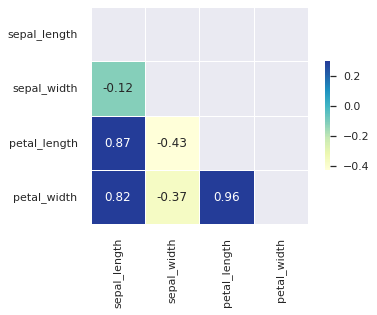

In [62]:
# Load the dataset
import seaborn as sns
data = sns.load_dataset("iris")

import seaborn as sns
import numpy as np

mask = np.triu(np.ones_like(data.corr(), dtype = bool))
fig = sns.heatmap(data.corr(), 
                  mask = mask,  
                  cmap="YlGnBu", 
                  annot=True, 
                  vmax = 0.3, 
                  center = 0, 
                  square = True, 
                  linewidths = 0.5, 
                  cbar_kws = {'shrink':0.5})

## Validation curve

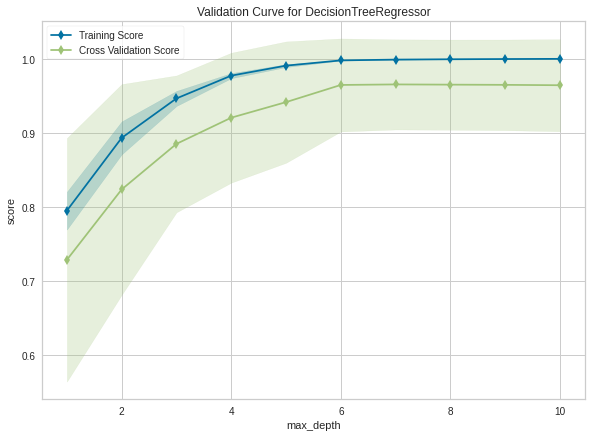

<AxesSubplot:title={'center':'Validation Curve for DecisionTreeRegressor'}, xlabel='max_depth', ylabel='score'>

In [4]:
# Load the dataset and import the model
import yellowbrick.datasets
import sklearn.tree
X, y = yellowbrick.datasets.load_energy()

import yellowbrick.model_selection
import numpy as np

visualizer = yellowbrick.model_selection.ValidationCurve(
    sklearn.tree.DecisionTreeRegressor(), 
    param_name ="max_depth", 
    param_range = np.arange(1, 11), 
    scoring = "r2", 
    size = (700, 500))
visualizer.fit(X, y)
visualizer.show()

## ROC curves

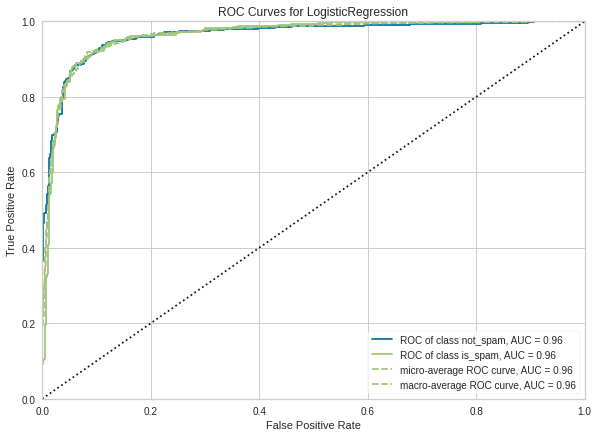

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [7]:
# Load the dataset, split data and initialize the model
import yellowbrick.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X, y = yellowbrick.datasets.load_spam()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LogisticRegression(multi_class = "auto", solver = "liblinear")

import yellowbrick.classifier

classes = ["not_spam", "is_spam"]
visualizer = yellowbrick.classifier.ROCAUC(
    model, 
    classes = classes, 
    size = (700, 500))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## Confusion matrix

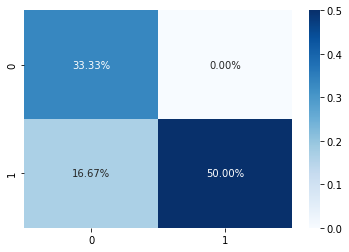

In [2]:
# Get the classes and predictions
y = [1, 0, 1, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 1]

import sklearn.metrics
import seaborn as sns
import numpy as np

cm = sklearn.metrics.confusion_matrix(y, y_pred)
fig = sns.heatmap(
    cm/np.sum(cm), 
    fmt = '.2%', 
    annot = True, 
    cmap = 'Blues')

## Learning curve

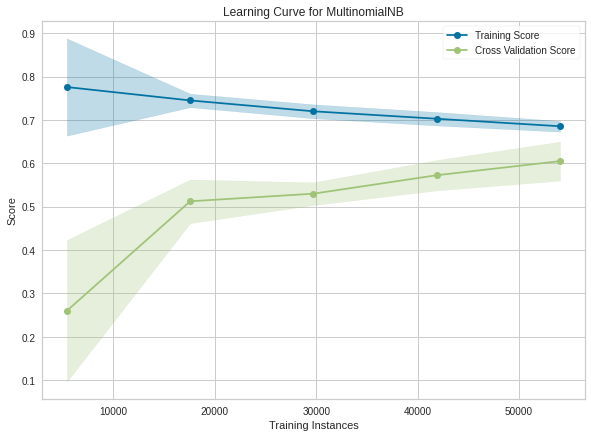

<AxesSubplot:title={'center':'Learning Curve for MultinomialNB'}, xlabel='Training Instances', ylabel='Score'>

In [9]:
# Load, encode data and initialize the model
import yellowbrick.datasets
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
X, y = yellowbrick.datasets.load_game()
X = OneHotEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)
model = MultinomialNB()

import yellowbrick.model_selection

visualizer = yellowbrick.model_selection.LearningCurve(
    model, 
    scoring = 'f1_weighted', 
    size = (700, 500))
visualizer.fit(X, y)
visualizer.show()